In [50]:
import matplotlib.pyplot as pltt #intentar para el pair anterior
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, kstest
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

Partiendo del conjuntos de datos contestad a las siguientes preguntas:

La variable price representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y badge_fast_shipping. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

Calcula la media y la mediana de la variable mean_product_prices. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

Realiza un análisis de correlación entre total_units_sold y mean_product_ratings_count. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y seller_reputation. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

Calcula la media y la mediana de la variable discount_percentage. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas badge_fast_shipping y seller_reputation. ¿Qué puedes concluir sobre la distribución de las calificaciones altas?

In [51]:
df = pd.read_csv("merchant_fill_nonulls.csv")

In [52]:
df.head()

,Unnamed: 0,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0
2,2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular,18.0,23.0,8.0,7.0,43.0
3,3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular,7.0,8.0,5.0,5.0,22.0
4,4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular,1.0,2.0,2.0,1.0,1.0


EJERCICIO 1

media

In [53]:
media_price = round(df['price'].mean(),2)
media_price

8.33

mediana

In [54]:
mediana_price = round(df['price'].median(),2)
mediana_price

8.0

En este caso, la media y la mediana son similares. La media se ve influenciada por los valores atípicos por lo que a veces no cinviene usarla.

EJERCICIO 2

Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

In [55]:
from itertools import combinations

numericas = df.select_dtypes(include=np.number)
numericas_comb = list(combinations(numericas, 2))
numericas_comb

[('Unnamed: 0', 'price'),
 ('Unnamed: 0', 'retail_price'),
 ('Unnamed: 0', 'units_sold'),
 ('Unnamed: 0', 'rating_sold'),
 ('Unnamed: 0', 'rating_count'),
 ('Unnamed: 0', 'shipping_option_price'),
 ('Unnamed: 0', 'countries_shipped_to'),
 ('Unnamed: 0', 'inventory_total'),
 ('Unnamed: 0', 'merchant_rating_count'),
 ('Unnamed: 0', 'listed_products'),
 ('Unnamed: 0', 'total_units_sold'),
 ('Unnamed: 0', 'mean_units_sold_per_product'),
 ('Unnamed: 0', 'rating_employee'),
 ('Unnamed: 0', 'merchant_ratings_count'),
 ('Unnamed: 0', 'mean_product_prices'),
 ('Unnamed: 0', 'mean_retail_prices'),
 ('Unnamed: 0', 'mean_product_ratings_count'),
 ('Unnamed: 0', 'discount_percentage'),
 ('Unnamed: 0', 'rating_four_count'),
 ('Unnamed: 0', 'rating_three_count'),
 ('Unnamed: 0', 'rating_two_count'),
 ('Unnamed: 0', 'rating_one_count'),
 ('Unnamed: 0', 'rating_five_count'),
 ('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_sold'),
 ('price', 'rating_count'),
 ('price', 'shipping

In [56]:
variables = df[["price", "retail_price", "units_sold", "rating_sold", "rating_count"]]
numericas_comb = list(combinations(variables, 2))
numericas_comb

[('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_sold'),
 ('price', 'rating_count'),
 ('retail_price', 'units_sold'),
 ('retail_price', 'rating_sold'),
 ('retail_price', 'rating_count'),
 ('units_sold', 'rating_sold'),
 ('units_sold', 'rating_count'),
 ('rating_sold', 'rating_count')]

In [57]:
matrix = variables.corr()
matrix

,price,retail_price,units_sold,rating_sold,rating_count
price,1.000000,0.304748,-0.024815,0.053469,-0.001911
retail_price,0.304748,1.000000,0.012638,0.024106,0.053872
units_sold,-0.024815,0.012638,1.000000,0.039478,0.899464
rating_sold,0.053469,0.024106,0.039478,1.000000,0.054112
rating_count,-0.001911,0.053872,0.899464,0.054112,1.000000


In [58]:
mascara = np.triu(np.ones_like(matrix, dtype=bool))

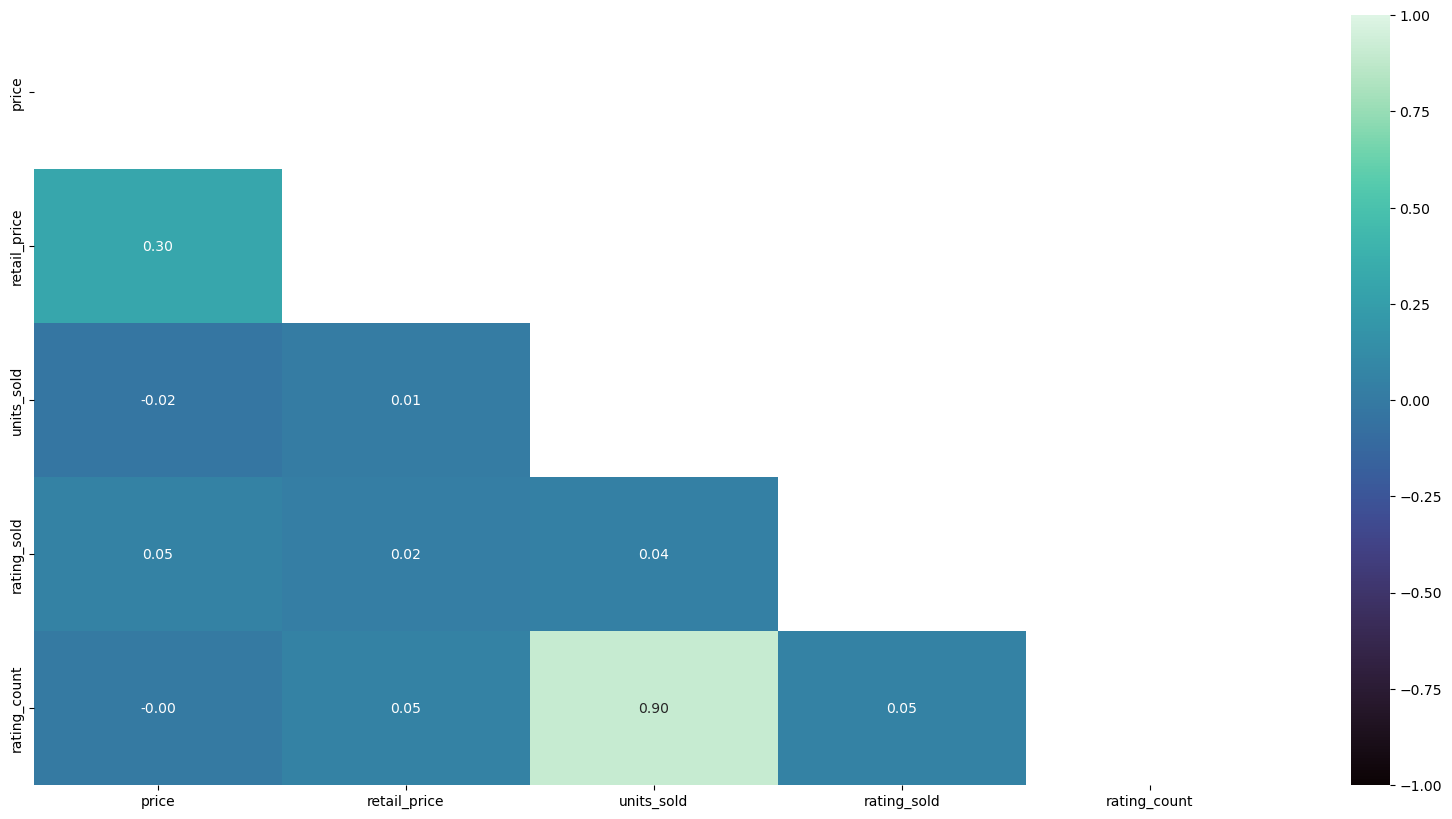

In [59]:
pltt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap= 'mako', vmin=-1, vmax='1', mask = mascara);

entre rating_count y units_sold hay una mayor correlación de tipo positiva.
única correlación negativa entre units-sold y price, pero es 0.
correlación leve entre retail_price y price

EJERCICIO 3

Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

In [60]:
pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'])

badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,826,66
Si,630,51


In [61]:
pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'], normalize=True)*100

badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,52.511125,4.195804
Si,40.050858,3.242212


In [62]:
df["badge_product_quality"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1573 entries, 0 to 1572
Series name: badge_product_quality
Non-Null Count  Dtype 
--------------  ----- 
1573 non-null   object
dtypes: object(1)
memory usage: 12.4+ KB


In [63]:
df["badge_product_quality"].value_counts()

badge_product_quality
Buena        1456
Excelente     117
Name: count, dtype: int64

EJERCICIO 4

Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y badge_fast_shipping. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

In [64]:
pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'])

badge_fast_shipping,No,Si
badge_local_product,,
No,1533,11
Si,20,9


In [65]:
pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'], normalize=True)*100

badge_fast_shipping,No,Si
badge_local_product,,
No,97.457088,0.699301
Si,1.271456,0.572155


No, no hay relación entre las variables porque los productos que no tienen etiqueta local no suelen tener la etiqueta de fast shipping, y el fast shipping casi no se pide.

EJERCICIO 5

Calcula la media y la mediana de la variable mean_product_prices. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

In [66]:
media_mean_product_prices = round(df['mean_product_prices'].mean(),2)
media_mean_product_prices

8.33

In [67]:
mediana_mean_product_prices = round(df['mean_product_prices'].median(),2)
mediana_mean_product_prices

8.0

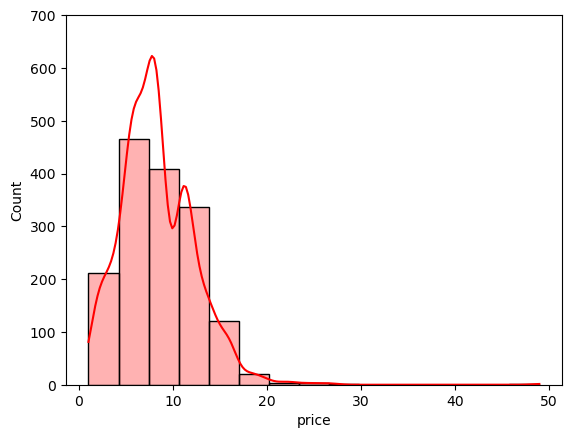

In [68]:
sns.histplot(data=df, x = 'price', bins = 15, kde=True, color='red', stat='count', alpha = 0.3);
pltt.ylim(0,700);

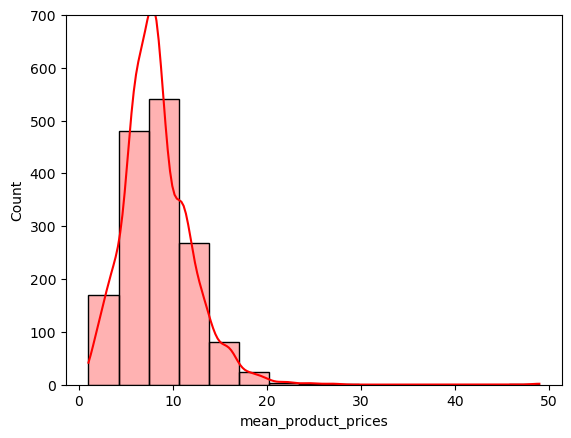

In [69]:
sns.histplot(data=df, x = 'mean_product_prices', bins = 15, kde=True, color='red', stat='count', alpha = 0.3);
pltt.ylim(0,700);

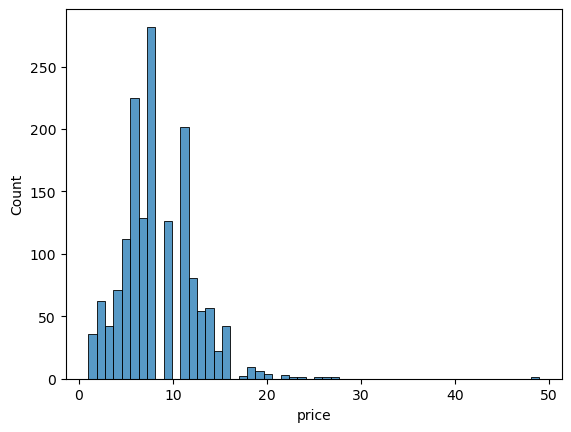

In [70]:
sns.histplot(data=df, x = 'price');

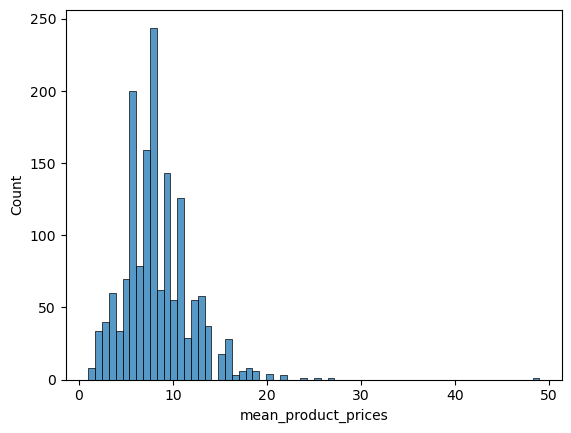

In [71]:
sns.histplot(data=df, x = 'mean_product_prices');

In [72]:
df["mean_product_prices"].value_counts()

mean_product_prices
8.00     197
11.00    115
7.00      93
9.00      84
6.00      76
        ... 
1.68       1
3.93       1
4.68       1
3.84       1
27.00      1
Name: count, Length: 193, dtype: int64

In [73]:
df["price"].value_counts()

price
8.00     282
11.00    202
7.00     129
9.00     126
6.00     120
        ... 
4.74       1
2.83       1
2.76       1
4.73       1
27.00      1
Name: count, Length: 127, dtype: int64

Igual que en la variable, price, la media y la mediana son my similares. El promedio del precio de los productos no es demasiado alto, va aprox. de 5 a 10.

EJERCICIO 6

Realiza un análisis de correlación entre total_units_sold y mean_product_ratings_count. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.